## **Calculating BMI using Simple Workflow**

In [16]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [17]:
# define state
class BMIState(TypedDict):
    weight: float  # in kg
    height: float  # in meters
    bmi: float     # Body Mass Index
    category: str  # BMI category

In [18]:
# calculate bmi
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight']
    height = state['height']
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2) # round to 2 decimal places
    return state

In [ ]:
# categorize bmi
def categorize_bmi(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        state['category'] = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        state['category'] = 'Normal weight'
    elif 25 <= bmi < 29.9:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obese'

    return state

In [20]:
# define graph
graph = StateGraph(BMIState)

# define nodes for the graph
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('categorize_bmi', categorize_bmi)

# add edges to the graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'categorize_bmi')
graph.add_edge('categorize_bmi', END)

# compile the graph
workflow = graph.compile()

In [24]:
# execute the workflow
initial_state = {'weight': 72, 'height': 1.75}

final_state = workflow.invoke(initial_state)

print(final_state)

{'weight': 72, 'height': 1.75, 'bmi': 23.51, 'category': 'Normal weight'}


- **View Your Graph Visually**

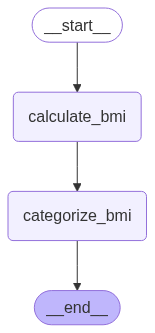

In [25]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())